In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from quantecon import Kalman
from quantecon import LinearStateSpace
from scipy.stats import norm

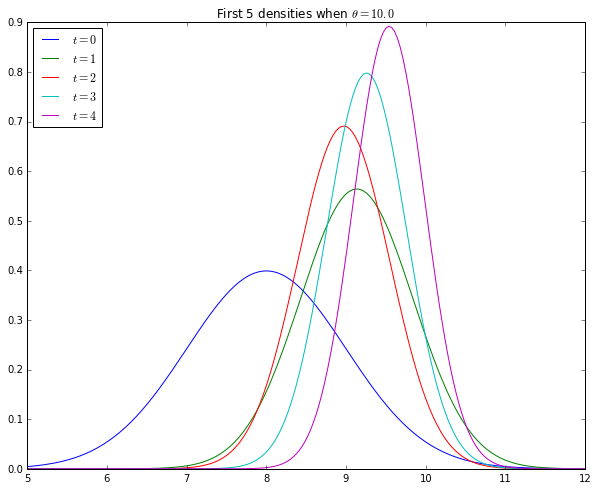

In [2]:
#==parameters==#
theta = 10 #constant value fo state x_t
A, C, G, H =1, 0, 1, 1
ss = LinearStateSpace(A, C, G, H, mu_0=theta)

#==set prior, initialize kalman filter==#
x_hat_0, Sigma_0 = 8, 1
kalman =Kalman(ss, x_hat_0, Sigma_0)

#==draw observations of y from state space model==#
N = 5
x, y =ss.simulate(N)
y = y.flatten()

#==set up plot==#
fig, ax = plt.subplots(figsize=(10, 8))
xgrid = np.linspace(theta - 5, theta +2, 200)

for i in range(N):
    #== record the current predicted mean and variance==#
    m, v = [float(z) for z in (kalman.x_hat, kalman.Sigma)]
    #==plot, update filter==#
    ax.plot(xgrid, norm.pdf(xgrid, loc=m, scale=np.sqrt(v)), label=r'$t=%d$' % i)
    kalman.update(y[i])
    
ax.set_title(r'First %d densities when $\theta = %.1f$' % (N, theta))
ax.legend(loc='upper left')

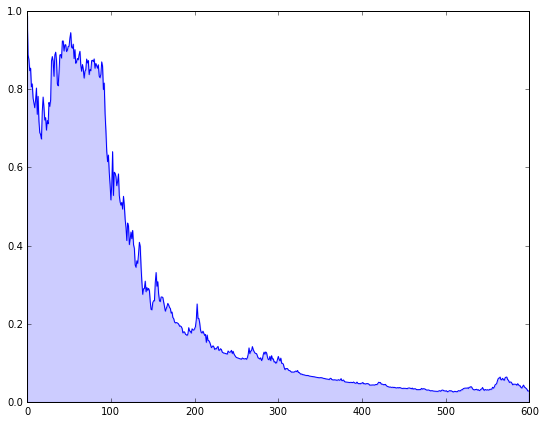

In [4]:
from scipy.integrate import quad

epsilon = 0.1
theta = 10 #constant value of state x_t
A, C, G, H = 1, 0, 1, 1
ss = LinearStateSpace(A, C, G, H, mu_0=theta)

x_hat_0, Sigma_0 = 8, 1
kalman = Kalman(ss, x_hat_0, Sigma_0)

T = 600
z = np.empty(T)
x, y = ss.simulate(T)
y = y.flatten()

for t in range(T):
    #record the current predicted mean and variance, and plot their densities
    m, v = [float(temp) for temp in (kalman.x_hat, kalman.Sigma)]
    
    f = lambda x: norm.pdf(x, loc=m, scale=np.sqrt(v))
    integral, error = quad(f, theta - epsilon, theta + epsilon)
    z[t] = 1 - integral
    
    kalman.update(y[t])
    
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_ylim(0, 1)
ax.set_xlim(0, T)
ax.plot(range(T), z)
ax.fill_between(range(T), np.zeros(T), z, color="blue", alpha=0.2)

Eigenvalues of A:
[ 0.9+0.j -0.1+0.j]
stationary prediction error variance:
[[ 0.40329108  0.1050718 ]
 [ 0.1050718   0.41061709]]


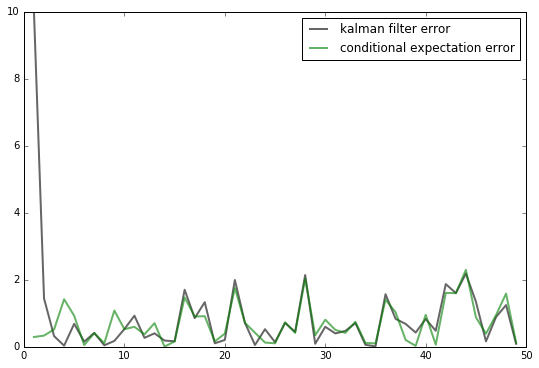

In [5]:
from numpy.random import multivariate_normal
from scipy.linalg import eigvals

#==define A, C, G, H==#
G = np.identity(2)
H = np.sqrt(0.5) * np.identity(2)

A = [[0.5, 0.4],
    [0.6, 0.3]]
C = np.sqrt(0.3) * np.identity(2)

#==set up state space model, initial value x_0 set to zero==#
ss = LinearStateSpace(A, C, G, H, mu_0=np.zeros(2))

#==define the prior density==#
Sigma = [[0.9, 0.3],
       [0.3, 0.9]]
Sigma = np.array(Sigma)
x_hat = np.array([8, 8])

#==initialize the kalman filter==#
kn = Kalman(ss, x_hat, Sigma)

#==print eigenvalues of A ==#
print("Eigenvalues of A:")
print(eigvals(A))

#==print stationary Sigma==#
S, K =kn.stationary_values()
print("stationary prediction error variance:")
print(S)

#==generate the plot==#
T= 50
x, y =ss.simulate(T)

e1 = np.empty(T-1)
e2 = np.empty(T-1)

for t in range(1, T):
    kn.update(y[:,t])
    e1[t-1] = np.sum((x[:, t] - kn.x_hat.flatten())**2)
    e2[t-1] = np.sum((x[:, t] - np.dot(A, x[:, t-1]))**2)
    
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(range(1, T), e1, 'k-', lw=2, alpha=0.6, label='kalman filter error')
ax.plot(range(1, T), e2, 'g-', lw=2, alpha=0.6, label='conditional expectation error')
ax.legend()